### Import libraries and packages

In [1]:
# MODEL
from sentence_transformers import SentenceTransformer, util

# DATA CLEANING
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import numpy as np
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer

# VISUALIZATION
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

### Initialize the transformation model

In [2]:
# import the model
model = SentenceTransformer('stsb-roberta-large')

### Read the data

In [3]:
# read the data
data = pd.read_csv('ocd.csv')
data.head()

,user_ID,followers_count,user_location,user_description,date,text,hashtags
0,8.293180e+17,294,Eora Nation,PhD candidate in gender and cultural studies @...,10/27/2021 11:59,New research out finds that #acupuncture reduc...,NaN
1,4.150866e+08,432,London,Children’s Book Illustrator 🎨 & former @pathwa...,10/27/2021 11:51,New research out finds that #acupuncture reduc...,['ocd']
2,1.311980e+18,17,NaN,One of the greatest regrets in life is being w...,10/27/2021 11:26,New research out finds that #acupuncture reduc...,['oknottobeok']
3,8.996297e+07,29198,"Boulder CO, USA",Peter Strong - Psychotherapist specializing in...,10/27/2021 11:25,New research out finds that #acupuncture reduc...,['OCD']
4,8.853120e+17,981,Hell,A free thinker and freelance writer\r\r\n\r\r\...,10/27/2021 11:06,New research out finds that #acupuncture reduc...,NaN


In [4]:
# see a tweet example
data.text[0]

"New research out finds that #acupuncture reduces #depression &amp; enhances SSRI performance https://t.co/TIBa8O94vm \r\r\nWe've always known how beneficial it is, so its good to have the evidence to back it up. Acupuncture can really help!\r\r\n\r\r\n#mentalhealth https://t.co/OtkjCKTKX4"

### Clean the data

In [5]:
# remove unnecessary information for tweets

def remove_links(tweet):
    '''Takes a string and removes web links from it'''
    tweet = re.sub(r'http\S+', '', tweet) # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet) # rempve bitly links
    tweet = tweet.strip('[link]') # remove [links]
    return tweet

def remove_users(tweet):
    '''Takes a string and removes retweet and @user information'''
    tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove retweet
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove tweeted at
    tweet = re.sub ('#', '', tweet)
    return tweet


def remove_emojis(tweet):
    '''Takes emojis out from strings.'''
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', tweet)
my_punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`’{|}~•@'

# cleaning master function
def clean_tweet(tweet):
    tweet = remove_users(tweet)
    tweet = remove_links(tweet)
    tweet = remove_emojis(tweet)
    tweet = tweet.lower() # lower case
    tweet = re.sub('['+my_punctuation + ']+', ' ', tweet) # strip punctuation
    tweet = re.sub('\s+', ' ', tweet) #remove double spacing
    tweet = re.sub('([0-9]+)', '', tweet) # remove numbers

    return tweet

In [6]:
data['clean_tweet'] = data.text.apply(clean_tweet)

In [7]:
# make a list of tweets to analyze
tweets_corpus = list(data['clean_tweet'])

### Visualize the most common words

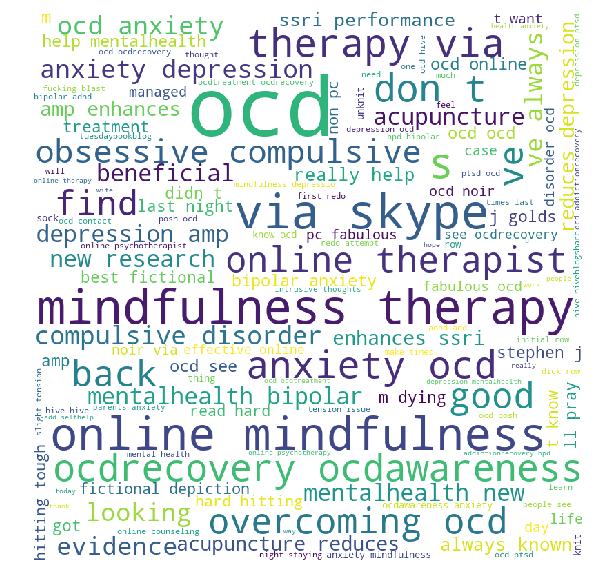

In [8]:
stopwords = set(STOPWORDS)

tweeets = ''

for val in tweets_corpus:

    tokens = val.split()
     
    tweeets += " ".join(tokens)+" "
    
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(tweeets)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### Introduce the model tweets based on DSM-5

In [9]:
# model tweets based on DSM-5

model_tweet_diagnosis = ["OCD is diagnosed after obsessive, persistent and repetitive thoughts and compulsions, urges or images that are intrusive or unwanted. These actions are performed with the aim of reducing anxiety while following rigid rules."]
model_tweet_experience = ["Ordinary tasks may induce anxiety, panic attaks, feelings of uneasiness, irritation, disgust for people with OCD."]
model_tweet_impact = ["People with OCD may exclude many social settings because of concerns of contaminants, potential harm or threats (i.e. fear of dying). This also reduces their social interactions. The comorbidity with anxiety affects the normal life even at larger scales."]
model_tweet_stats = ["OCD can appear at any age, but usually it appears in young adulthood or post-puberty. In adulthood, females are affected more than males, while in childhood, males are more affected."]
model_tweet_treatment = ["The two main treatments for OCD are psychotherapy and medications. Often, treatment is most effective with a combination of these."]


print(model_tweet_diagnosis)
print('')
print(model_tweet_experience)
print('')
print(model_tweet_impact)
print('')
print(model_tweet_stats)
print('')
print(model_tweet_treatment)

['OCD is diagnosed after obsessive, persistent and repetitive thoughts and compulsions, urges or images that are intrusive or unwanted. These actions are performed with the aim of reducing anxiety while following rigid rules.']

['Ordinary tasks may induce anxiety, panic attaks, feelings of uneasiness, irritation, disgust for people with OCD.']

['People with OCD may exclude many social settings because of concerns of contaminants, potential harm or threats (i.e. fear of dying). This also reduces their social interactions. The comorbidity with anxiety affects the normal life even at larger scales.']

['OCD can appear at any age, but usually it appears in young adulthood or post-puberty. In adulthood, females are affected more than males, while in childhood, males are more affected.']

['The two main treatments for OCD are psychotherapy and medications. Often, treatment is most effective with a combination of these.']


### Clean the model tweets

In [10]:
# clean the tweets

model_tweet_diagnosis = [clean_tweet(model_tweet_diagnosis[0])]
model_tweet_experience =  [clean_tweet(model_tweet_experience[0])]
model_tweet_impact = [clean_tweet(model_tweet_impact[0])]
model_tweet_stats = [clean_tweet(model_tweet_stats[0])]
model_tweet_treatment = [clean_tweet(model_tweet_treatment[0])]

In [11]:
# see an example of model tweet after cleaning
model_tweet_diagnosis

['ocd is diagnosed after obsessive persistent and repetitive thoughts and compulsions urges or images that are intrusive or unwanted these actions are performed with the aim of reducing anxiety while following rigid rules ']

### Encode the tweets into tensor embeddings (vector)

In [13]:
# encode model tweets
model_tweet_1 = model.encode(model_tweet_diagnosis, convert_to_tensor=True)
model_tweet_2 = model.encode(model_tweet_experience, convert_to_tensor=True)
model_tweet_3 = model.encode(model_tweet_impact, convert_to_tensor=True)
model_tweet_4 = model.encode(model_tweet_stats, convert_to_tensor=True)
model_tweet_5 = model.encode(model_tweet_treatment, convert_to_tensor=True)

The encoding of original tweets takes about 7 minutes, due to the big number of data points

In [14]:
# encode list of sentences to get their embeddings
tweets = model.encode(tweets_corpus, convert_to_tensor=True)

In [15]:
# see a tweet after encoding
tweets[0]

tensor([-0.4229, -0.1916, -1.3454,  ...,  1.8826, -0.7734,  0.5859],
       device='cuda:0')

### Compute Similarity Scores between each original tweet vs model tweet

In [16]:
def similarity(tweets, model_tweet):
    '''
    Computes the cosine similarity betweent two sentences.
    
    Input:
    -----------------------------------------------------
    tweets (list of tensors): all tweets encoded
    model_tweet (tensor): model tweets encoded
    
    Output:
    -----------------------------------------------------
    similarity_score(float): cosine similarity
    '''
    similarity_scores = []
    cosine_scores = util.pytorch_cos_sim(tweets, model_tweet)
    
    for i in range(len(tweets)):
        for j in range(len(model_tweet)):
            similarity = cosine_scores[i][j].item()
            similarity_scores.append(similarity)

    return similarity_scores

### Add similarity scores to the dataset

In [17]:
data['Similarity Score: Diagnosis'] = similarity(tweets, model_tweet_1)

In [18]:
data['Similarity Score: Experience'] = similarity(tweets, model_tweet_2)

In [19]:
data['Similarity Score: Impact'] = similarity(tweets, model_tweet_3)

In [20]:
data['Similarity Score: Stats'] = similarity(tweets, model_tweet_4)

In [21]:
data['Similarity Score: Treatment'] = similarity(tweets, model_tweet_5)

### Choose the most similar category for each tweet

In [22]:
most_similar = []
categories = ['Diagnosis', 'Experience', 'Impact','Stats', 'Treatment']

for i in range(len(data)):
    similarities = list(data.loc[i][8:13])
    maximum = max(similarities)
    most_similar.append(categories[similarities.index(maximum)])

In [23]:
data['Most Similar'] = most_similar

In [24]:
data['Most Similar'].describe()

count          2863
unique            5
top       Diagnosis
freq           1187
Name: Most Similar, dtype: object

In [25]:
data.head()

,user_ID,followers_count,user_location,user_description,date,text,hashtags,clean_tweet,Similarity Score: Diagnosis,Similarity Score: Experience,Similarity Score: Impact,Similarity Score: Stats,Similarity Score: Treatment,Most Similar
0,8.293180e+17,294,Eora Nation,PhD candidate in gender and cultural studies @...,10/27/2021 11:59,New research out finds that #acupuncture reduc...,NaN,new research out finds that acupuncture reduce...,0.263539,0.206399,0.210182,0.072445,0.440645,Treatment
1,4.150866e+08,432,London,Children’s Book Illustrator 🎨 & former @pathwa...,10/27/2021 11:51,New research out finds that #acupuncture reduc...,['ocd'],new research out finds that acupuncture reduce...,0.263539,0.206399,0.210182,0.072445,0.440645,Treatment
2,1.311980e+18,17,NaN,One of the greatest regrets in life is being w...,10/27/2021 11:26,New research out finds that #acupuncture reduc...,['oknottobeok'],new research out finds that acupuncture reduce...,0.263539,0.206399,0.210182,0.072445,0.440645,Treatment
3,8.996297e+07,29198,"Boulder CO, USA",Peter Strong - Psychotherapist specializing in...,10/27/2021 11:25,New research out finds that #acupuncture reduc...,['OCD'],new research out finds that acupuncture reduce...,0.263539,0.206399,0.210182,0.072445,0.440645,Treatment
4,8.853120e+17,981,Hell,A free thinker and freelance writer\r\r\n\r\r\...,10/27/2021 11:06,New research out finds that #acupuncture reduc...,NaN,new research out finds that acupuncture reduce...,0.263539,0.206399,0.210182,0.072445,0.440645,Treatment


In [26]:
data['Most Similar'].value_counts()

Diagnosis     1187
Treatment      569
Experience     418
Impact         387
Stats          302
Name: Most Similar, dtype: int64

### Plots

In [27]:
counts =  list(data['Most Similar'].value_counts())

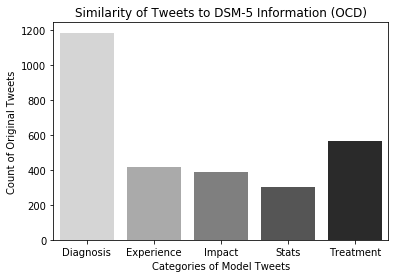

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
 
# count plot on single categorical variable
p = sns.countplot(x ='Most Similar', data = data, palette = "binary", order=['Diagnosis','Experience','Impact','Stats','Treatment'])
p.set_xlabel('Categories of Model Tweets')
p.set_ylabel('Count of Original Tweets')
p.set_title('Similarity of Tweets to DSM-5 Information (OCD)')
 
# show the plot
plt.show()

In [29]:
treatment_filter = data[data['Most Similar']=='Treatment']
treatment_max = max(list(treatment_filter['Similarity Score: Treatment']))

In [30]:
diagnosis_filter = data[data['Most Similar']=='Diagnosis']
diagnosis_max = max(list(treatment_filter['Similarity Score: Diagnosis']))


In [31]:
experience_filter = data[data['Most Similar']=='Experience']
experience_max = max(list(treatment_filter['Similarity Score: Experience']))

In [32]:
impact_filter = data[data['Most Similar']=='Impact']
impact_max = max(list(treatment_filter['Similarity Score: Impact']))

In [33]:
stats_filter = data[data['Most Similar']=='Stats']
stats_max = max(list(treatment_filter['Similarity Score: Stats']))

In [34]:
maxes = [diagnosis_max, experience_max,impact_max,stats_max, treatment_max]

Text(0.5,1,'Highest Similarity Scores per Category (OCD)')

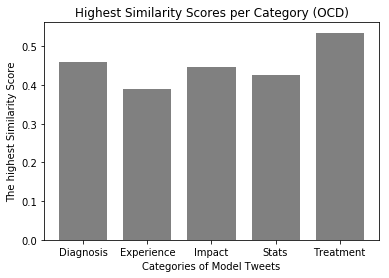

In [35]:
plt.bar(categories, maxes, color = 'gray',
        width = 0.75)
plt.xlabel('Categories of Model Tweets')
plt.ylabel('The highest Similarity Score')
plt.title('Highest Similarity Scores per Category (OCD)')

C:\Users\almag\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0,0.5,'Tweet Counts')

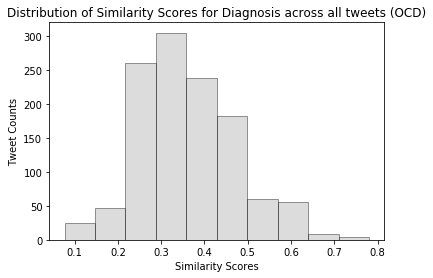

In [36]:
# seaborn histogram
sns.distplot(diagnosis_filter['Similarity Score: Diagnosis'], hist=True, kde=False, 
             bins=10, color = 'darkgrey',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Distribution of Similarity Scores for Diagnosis across all tweets (OCD)')
plt.xlabel('Similarity Scores')
plt.ylabel('Tweet Counts')

C:\Users\almag\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0,0.5,'Tweet Counts')

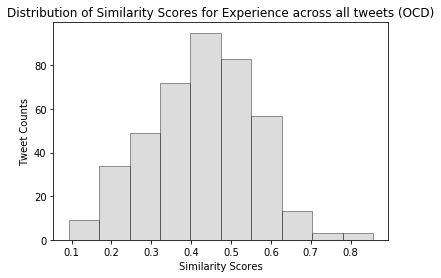

In [37]:
# seaborn histogram
sns.distplot(experience_filter['Similarity Score: Experience'], hist=True, kde=False, 
             bins=10, color = 'darkgrey',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Distribution of Similarity Scores for Experience across all tweets (OCD)')
plt.xlabel('Similarity Scores')
plt.ylabel('Tweet Counts')

C:\Users\almag\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0,0.5,'Tweet Counts')

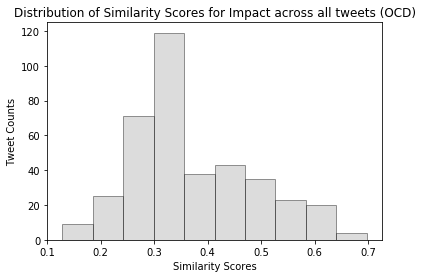

In [38]:
# seaborn histogram
sns.distplot(impact_filter['Similarity Score: Impact'], hist=True, kde=False, 
             bins=10, color = 'darkgrey',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Distribution of Similarity Scores for Impact across all tweets (OCD)')
plt.xlabel('Similarity Scores')
plt.ylabel('Tweet Counts')

C:\Users\almag\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0,0.5,'Tweet Counts')

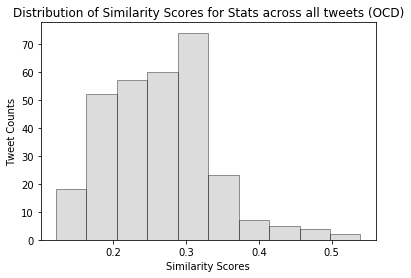

In [39]:
# seaborn histogram
sns.distplot(stats_filter['Similarity Score: Stats'], hist=True, kde=False, 
             bins=10, color = 'darkgrey',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Distribution of Similarity Scores for Stats across all tweets (OCD)')
plt.xlabel('Similarity Scores')
plt.ylabel('Tweet Counts')

C:\Users\almag\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0,0.5,'Tweet Counts')

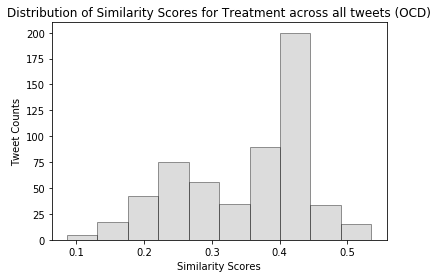

In [40]:
# seaborn histogram
sns.distplot(treatment_filter['Similarity Score: Treatment'], hist=True, kde=False, 
             bins=10, color = 'darkgrey',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Distribution of Similarity Scores for Treatment across all tweets (OCD)')
plt.xlabel('Similarity Scores')
plt.ylabel('Tweet Counts')

In [41]:
data.to_csv('OCD with sS scores.csv')